In [9]:
#Importing libraries
import numpy as np
import pandas as pd
from scipy.stats import ttest_1samp, ttest_ind

In [10]:
#Reading CSV file
mydata = pd.read_csv('C:/Users/Thiyaneswaran_Manoha/Downloads/A+&+B+shingles.csv')
mydata.head()
mydata['B'].head(40)
mydata['B'].fillna(0, inplace=True)
mydata['B'].head(40)

0     0.14
1     0.15
2     0.31
3     0.16
4     0.37
5     0.18
6     0.42
7     0.58
8     0.25
9     0.41
10    0.17
11    0.13
12    0.23
13    0.11
14    0.10
15    0.19
16    0.22
17    0.44
18    0.11
19    0.11
20    0.31
21    0.43
22    0.26
23    0.18
24    0.44
25    0.43
26    0.16
27    0.52
28    0.36
29    0.22
30    0.39
31    0.00
32    0.00
33    0.00
34    0.00
35    0.00
Name: B, dtype: float64

In [11]:
#Outlier count
Q1 = mydata.quantile(0.25)
Q3 = mydata.quantile(0.75)
IQR = Q3 - Q1
((mydata < (Q1 - 1.5 * IQR)) | (mydata > (Q3 + 1.5 * IQR))).sum()

A    1
B    0
dtype: int64

In [12]:
#Covariance
mydata.cov()

,A,B
A,0.018423,-0.008038
B,-0.008038,0.025363


In [13]:
#Information about the data
mydata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 2 columns):
A    36 non-null float64
B    36 non-null float64
dtypes: float64(2)
memory usage: 656.0 bytes


In [14]:
#Statistical Metrics
mydata.describe(include="all")

,A,B
count,36.000000,36.000000
mean,0.316667,0.235556
std,0.135731,0.159256
min,0.130000,0.000000
25%,0.207500,0.125000
50%,0.290000,0.205000
75%,0.392500,0.375000
max,0.720000,0.580000


In [15]:
#Mean
mydata.mean()

A    0.316667
B    0.235556
dtype: float64

In [17]:
#The null hypothesis states that mean moisture content is, μμ <= 0.35 pound per 100 square feet
#The alternative hypothesis states that the mean intake energy, μμ > 0.35 pound per 100 square feet

#H0H0: μμ <= 0.35
# HAHA: μμ > 0.35

# This is One tailed Test. As we know population mean and we don’t know sigma(population std dev), so we need to use T test. 

# Tstat:= -1.4735046253382782
# Decision Rule: Reject Ho if tstat<-1.69 and df=35

# Decision: Since tSTAT > −1.690, do not reject H0 . There is enough evidence to conclude that the mean moisture content for shingles is less than/equal to 0.35 pounds per 100 square feet

# P= 0.14955266289815025
# P>0.05(Fail to Reject Null Hypothesis).
# As P is more than 0.05, we fail to reject null hypothesis.

# If the population mean moisture content is in fact less than/equal to 0.35 pounds per 100 square feet, the probability of observing a sample of 36 shingles that will result in a sample mean moisture content of 0.3167 pounds per 100 square feet or less is 0.149

t_statistic, p_value = ttest_1samp(mydata['A'],0.35)
print(t_statistic,p_value)


-1.4735046253382782 0.14955266289815025


In [19]:
#As B data has some blank values and it does not match with A count so B segregated as separated sheet but Still I tried on both ways
#By Considering A&B in the same file and B in separate file
mydata1 = pd.read_csv('C:/Users/Thiyaneswaran_Manoha/Downloads/Bbook.csv')
mydata1.head(40)

,B
0,0.14
1,0.15
2,0.31
3,0.16
4,0.37
5,0.18
6,0.42
7,0.58
8,0.25
9,0.41


In [20]:
#Mean of B
mydata1.mean()

B    0.273548
dtype: float64

In [25]:
# This is One tailed Test. As we know population mean and we don’t know sigma(population std dev), so we need to use T test.

# The null hypothesis states that mean moisture content is, μμ <= 0.35 pound per 100 square feet
# The alternative hypothesis states that the mean intake energy, μμ > 0.35 pound per 100 square feet

# H0H0: μμ <= 0.35
# HAHA: μμ > 0.35

# Decision rule: Reject H0 if tSTAT < -1.6973 d.f. = 30
# Tstat= -3.1003313069986995

# Decision: Since tSTAT < -1.6973, reject H0 . There is not enough evidence to conclude that the mean moisture content for B shingles is less than/equal to 0.35 pounds per 100 square feet

# Halt= the population mean moisture content is less than 0.35
# NullHyp= the population mean moisture content is = 0.35

# H0: μ = 0.35 
# H1 : μ < 0.35

# Based on T Statistic:
# P<0.05(Alt Hypothesis)
# P= 0.004180954800638363
# P<0.05 Reject Null Hypothesis).

# As P is less than 0.05, we tend to reject null hypothesis.

# If the population mean moisture content is in fact not equal to 0.35 pounds per 100 square feet, the probability of observing a sample of 31 shingles that will result in a sample mean moisture content of 0.2735 pounds per 100 square feet or less is .0041


t_statistic, p_value = ttest_1samp(mydata1['B'],0.35)
print(t_statistic,p_value)
#As P is less than 0.05, we tend to reject null hypothesis.
t_statistic1, p_value1 = ttest_1samp(mydata['B'],0.35)
print(t_statistic1,p_value1)

-3.1003313069986995 0.004180954800638363
-4.311710524179449 0.00012557068120902648


In [26]:
import numpy as np
from scipy.stats import ttest_1samp, wilcoxon
from statsmodels.stats.power import ttest_power

In [27]:
# one sample wilcoxon-test-To Calculate Z score and P value
z_statistic, p_value = wilcoxon(mydata['A'] - 0.35)
print ("one-sample wilcoxon-test A p-value", p_value)
#As P is more than 0.05, we are fail to reject null hypothesis).

z_statistic, p_value = wilcoxon(mydata1['B'] - 0.35)
print ("one-sample wilcoxon-test B p-value", p_value)
#As P is less than 0.05, we tend to reject null hypothesis.

z_statistic, p_value = wilcoxon(mydata['B'] - 0.35)
print ("one-sample wilcoxon-test B p-value", p_value)

one-sample wilcoxon-test A p-value 0.07578140352810894
one-sample wilcoxon-test B p-value 0.0060663183918927
one-sample wilcoxon-test B p-value 0.0004054413150830434


In [24]:
# Calculating Power of Test
# Compute the difference in Means between Population and Sample and divide it by Standard Deviation
# Set the number of Observations
# Set the alpha value and alternative values 'two-sided' , 'larger' , 'smaller'

print((np.mean(mydata['A']) - 0.35) / np.std(mydata['A']))
print((np.mean(mydata1['B']) - 0.35) / np.std(mydata1['B']))
print((np.mean(mydata['B']) - 0.35) / np.std(mydata['B']))

-0.24906774069335935
-0.5660404641942207
-0.7288120989335968


In [28]:
#T Test - 2 sided test
print(ttest_power(-0.249, nobs=36, alpha=0.05, alternative='two-sided'))
print(ttest_power(-0.566, nobs=31, alpha=0.05, alternative='two-sided'))
print(ttest_power(-0.7288, nobs=31, alpha=0.05, alternative='two-sided'))


0.30644743580450584
0.8619346209458303
0.9752819261984187


In [29]:
pre = mydata['A']
post = mydata1['B']
post1=mydata['B']

In [30]:
# T Statisitc when post=pre
t_statistic, p_value = ttest_1samp(post - pre, 0)
print(t_statistic, p_value)

nan nan


C:\Users\Thiyaneswaran_Manoha\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\Thiyaneswaran_Manoha\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\Thiyaneswaran_Manoha\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1831: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


In [31]:
# one sample wilcoxon-test
#Z value while pre=post (This one is compared in another notebook file and analysis is more clear there)
z_statistic, p_value = wilcoxon((post-pre) - 0)
print ("one-sample wilcoxon-test for  p-value", p_value)

one-sample wilcoxon-test for  p-value 0.05742730587615016


C:\Users\Thiyaneswaran_Manoha\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\morestats.py:2781: RuntimeWarning: invalid value encountered in greater
  r_plus = np.sum((d > 0) * r, axis=0)
C:\Users\Thiyaneswaran_Manoha\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\morestats.py:2782: RuntimeWarning: invalid value encountered in less
  r_minus = np.sum((d < 0) * r, axis=0)


In [32]:
# one sample wilcoxon-test
z_statistic, p_value = wilcoxon((post1-pre) - 0)
print ("one-sample wilcoxon-test for  p-value", p_value)

one-sample wilcoxon-test for  p-value 0.06418318872185905


In [33]:
(np.mean(post-pre) - 0.35) / np.std(post-pre)

-1.6889527399349267

In [34]:
(np.mean(mydata) - 0.35) / np.std(mydata)

A   -0.249068
B   -0.728812
dtype: float64

In [35]:
#Power of T test while pre=post wrt mean 0.35
print(ttest_power(-1.688, nobs=67, alpha=0.05, alternative='two-sided'))

1.0


In [36]:
(np.mean(post1-pre) - 0.35) / np.std(post1-pre)

-1.7870320029726072

In [37]:
(np.mean(post-pre) - 0.0) / np.std(post-pre)

-0.1541841278500059

In [38]:
(np.mean(post1-pre) - 0.0) / np.std(post1-pre)

-0.3362199387036091

In [39]:
(np.mean(post-pre) - 0.0) / np.std(post-pre)

-0.1541841278500059

In [40]:
#Power of T test when Post-pre is zero
print(ttest_power(-0.154, nobs=67, alpha=0.05, alternative='two-sided'))

0.23714630052571864


In [41]:
#Independent T test wher A&B are independent
# Halt= the population mean of A and B are not equal
# NullHyp= the population mean of A and B are equal

# Conclusion:

# Based on Ttest independent, where B’s NA are filled with zeros then Tstat=2.32 and P=0.02.

# Decision: P value is 0.02 where P<0.05 so null will go. We need to accept alternate hypothesis.
# So Population mean of A is not equal with Population mean of B as per Ttest independent test. 

# In order for the t test to be valid, the data are assumed to be independently drawn from a population that is normally distributed. Since the sample sizes are 36 and 31, respectively, which are considered quite large, the t distribution will provide a good approximation to the sampling distribution of the mean as long as the population distribution is not very skewed.

t_statistic, p_value = ttest_ind(mydata['A'], mydata['B'])
print(t_statistic,p_value)

t_statistic, p_value = ttest_ind(mydata['A'], mydata1['B'])
print(t_statistic,p_value)

2.3257710269401746 0.022933428704853095
1.289628271966112 0.2017496571835328


In [42]:
import pandas as pd
import seaborn as sb
from matplotlib import pyplot as plt

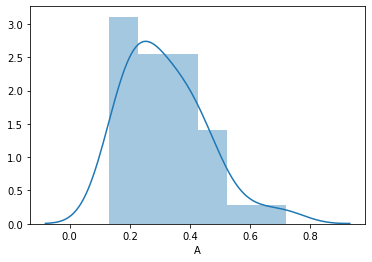

In [43]:
#Histogram B
sb.distplot(mydata['A'])
plt.show()

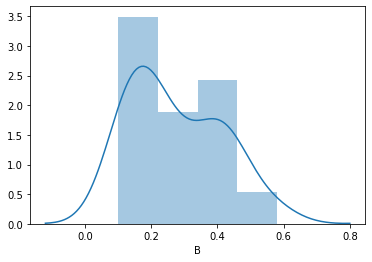

In [44]:
#Histogram B
sb.distplot(mydata1['B'])
plt.show()

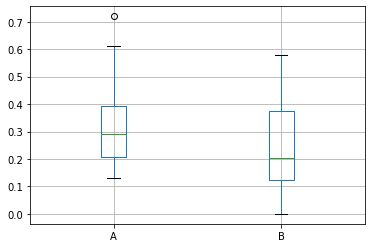

In [45]:
#BoxPlot
mydata.boxplot()

In [13]:
from scipy import stats
import matplotlib.pyplot as plt
nsample = 100
np.random.seed(7654321)
plt.show()

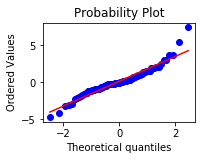

In [14]:
#A t distribution with small degrees of freedom:
ax1 = plt.subplot(221)
x = stats.t.rvs(3, size=nsample)
res = stats.probplot(x, plot=plt)
plt.show()

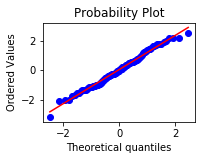

In [15]:
#A t distribution with larger degrees of freedom:
ax2 = plt.subplot(222)
x = stats.t.rvs(25, size=nsample)
res = stats.probplot(x, plot=plt)

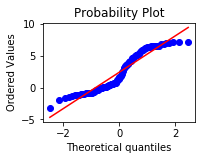

In [16]:
#A mixture of two normal distributions with broadcasting:

ax3 = plt.subplot(223)
x = stats.norm.rvs(loc=[0,5], scale=[1,1.5],
                   size=(nsample//2,2)).ravel()
res = stats.probplot(x, plot=plt)

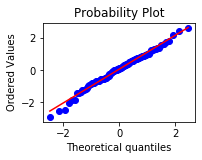

In [17]:
#A standard normal distribution:

ax4 = plt.subplot(224)
x = stats.norm.rvs(loc=0, scale=1, size=nsample)
res = stats.probplot(x, plot=plt)

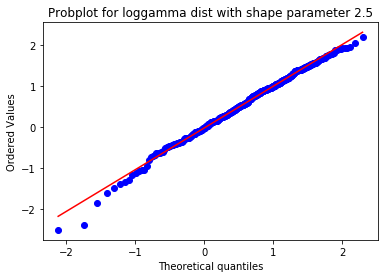

In [19]:
#Produce a new figure with a loggamma distribution, using the dist and sparams keywords:

fig = plt.figure()
ax = fig.add_subplot(111)
x = stats.loggamma.rvs(c=2.5, size=500)
res = stats.probplot(x, dist=stats.loggamma, sparams=(2.5,), plot=ax)
ax.set_title("Probplot for loggamma dist with shape parameter 2.5")
#Show the results with Matplotlib:
plt.show()

In [47]:
#Zscore
import scipy.stats as stats
#stats.norm.cdf(data['Spending'].max(),loc=data['Spending'].mean(),scale=data['Spending'].std()-stats.norm.cdf(data['Spending'].min(),loc=data['Spending'].mean(),scale=data['Spending'].std()
def statscdf(colname):
    max=mydata[colname].max()
    min=mydata[colname].min()
    mean=mydata[colname].mean()
    std=mydata[colname].std()
    print(max,min,mean,std)
    print(stats.norm.cdf(max,loc=mean,scale=std)-stats.norm.cdf(min,loc=mean,scale=std))

print("A set")
statscdf('A')

print("B set")
statscdf('B')

A set
0.72 0.13 0.3166666666666666 0.13573082605973166
0.9139948577076049
B set
0.58 0.0 0.23555555555555557 0.15925620767348342
0.9151659058600712


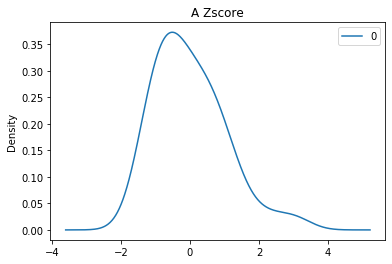

In [48]:
from scipy import stats
import matplotlib.pyplot as plot
def calcZscore(colname):
    Zscore=stats.zscore(mydata[colname])
    df=pd.DataFrame(Zscore)
    df.plot.kde()
    plot.title(colname+" Zscore")
    plot.show()
calcZscore('A')

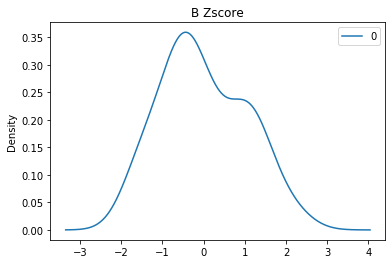

In [49]:
calcZscore('B')

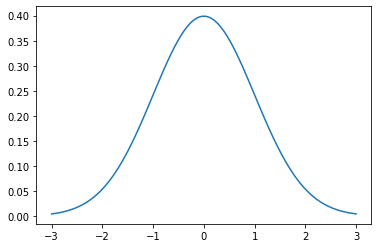

In [50]:
# Bell Shaped Curve Example
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import math

mu = 0
variance = 1
sigma = math.sqrt(variance)
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
plt.plot(x, stats.norm.pdf(x, mu, sigma))
plt.show()

In [51]:
mydata['count']=mydata.index+1
mydata.head()

,A,B,count
0,0.44,0.14,1
1,0.61,0.15,2
2,0.47,0.31,3
3,0.30,0.16,4
4,0.15,0.37,5


In [52]:
n_rows=mydata.shape[0]
n_rows

36

In [53]:
mydata['percentile area']=mydata['count']/n_rows
from scipy.special import ndtri
mydata['z_theoretical']=ndtri(mydata['percentile area'])
mydata['z_actual_A']=(mydata['A']-mydata['A'].mean())/mydata['A'].std(ddof=0)
mydata['z_actual_B']=(mydata['B']-mydata['B'].mean())/mydata['B'].std(ddof=0)
mydata.head()

,A,B,count,percentile area,z_theoretical,z_actual_A,z_actual_B
0,0.44,0.14,1,0.027778,-1.914506,0.921551,-0.608523
1,0.61,0.15,2,0.055556,-1.593219,2.191796,-0.544840
2,0.47,0.31,3,0.083333,-1.382994,1.145712,0.474082
3,0.30,0.16,4,0.111111,-1.220640,-0.124534,-0.481158
4,0.15,0.37,5,0.138889,-1.085325,-1.245339,0.856177


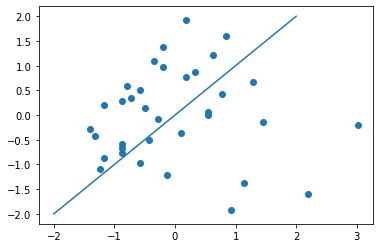

In [54]:
#Normal Dist Plot
import matplotlib.pyplot as plt
plt.scatter(mydata['z_actual_A'],mydata['z_theoretical'])
plt.plot([-2,-1,0,1,2],[-2,-1,0,1,2])
plt.show()

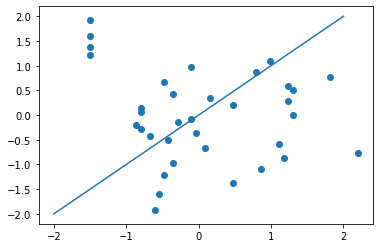

In [55]:
plt.scatter(mydata['z_actual_B'],mydata['z_theoretical'])
plt.plot([-2,-1,0,1,2],[-2,-1,0,1,2])
plt.show()

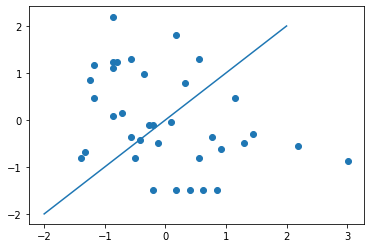

In [56]:
plt.scatter(mydata['z_actual_A'],mydata['z_actual_B'])
plt.plot([-2,-1,0,1,2],[-2,-1,0,1,2])
plt.show()

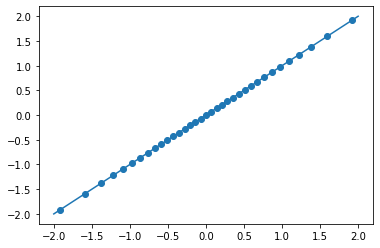

In [57]:
plt.scatter(mydata['z_theoretical'],mydata['z_theoretical'])
plt.plot([-2,-1,0,1,2],[-2,-1,0,1,2])
plt.show()

In [58]:
#Gaussian Test
from scipy.stats import shapiro
def gaussiantest(data,startindex,endindex):
    for i in range(startindex,endindex):
        stat, p = shapiro(data.iloc[:,i])
        print(data.columns.values[i]+ " p Value " + str(p))
        alpha = 0.05
        if p > alpha:
            print('if the p value is greater than the chosen alpha level, then the null hypothesis that the data came from a normally distributed population can not be rejected ')
        else:
            print(' if the p value is less than the chosen alpha level, then the null hypothesis is rejected and there is evidence that the data tested are not normally distributed')

gaussiantest(mydata,0,2)

A p Value 0.042670514434576035
 if the p value is less than the chosen alpha level, then the null hypothesis is rejected and there is evidence that the data tested are not normally distributed
B p Value 0.09961479157209396
if the p value is greater than the chosen alpha level, then the null hypothesis that the data came from a normally distributed population can not be rejected 
